In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../ResultsWSM')
sys.path.insert(0, '../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization_utils import perc, SetPlotRC, ApplyFont

In [2]:
if not os.path.exists("Figures"):
    os.mkdir("Figures")

# NNAntisparse

In [3]:
# df_nnanti_results = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV1.pkl")

In [4]:
# results = df_nnanti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
# # results
# table = pd.DataFrame(columns = (["rho"] + list(df_nnanti_results['Model'].unique())))
# table['rho'] = np.array([0.1*j for j in range(9)])
# for m in list(table.columns[1:]):
#     table[m] = results.loc[results['Model'] == m]['SINR'].values
    
# table

In [5]:
# df_nnanti_results.loc[(df_nnanti_results['Model'] == 'CorInfoMax2') & (df_nnanti_results['rho'] == 0.8)]['SINR'].hist()

In [6]:
# df_nnanti_results.loc[df_nnanti_results['SINR'] == -999]

In [7]:
# df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
# results = df_nnanti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
# results

In [8]:
# SetPlotRC()

# # results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
# SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
# SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
# SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
# SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
# SINRNSM = results.loc[results['Model'] == 'NSM']['SINR'].to_numpy()
# SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
# SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
# rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
# fh2=plt.figure(figsize=(10, 6), dpi=80)

# plt.plot(rholist,SINRCorInfoMax,linewidth=4)
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4)
# plt.plot(rholist,SINRBCA,'r--',linewidth=4)
# plt.plot(rholist,SINRIca,'g--',linewidth=4)
# plt.plot(rholist,SINRNSM,'b--',linewidth=4)
# plt.plot(rholist,SINRLDMI,'k--',linewidth=4)
# plt.plot(rholist,SINRPMF,'o--',linewidth=4)

# gh=plt.grid(linewidth=2)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r"$\rho$",fontsize=25)
# plt.legend(['CorInfoMax','CorInfoMax2','OnlineBCA','ICA-Infomax', 'NSM','LD-InfoMax', 'PMF'],loc='lower left',fontsize=20)
# plt.axis([0.0,0.8,-0,37])
# plt.title('Nonnegative Anti-sparse Source Separation SINR Results',fontsize=20)
# ApplyFont(plt.gca())


In [9]:
df_nnanti_results = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV2.pkl").iloc[:int(9*7*100)]
print('Shape : {}'.format(df_nnanti_results.shape))
print('Number of diverge cases for CorInfoMax is : ')
print(df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'CorInfoMax')].shape[0])
df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
# df_nnanti_results.iloc[-20:]

Shape : (6300, 13)
Number of diverge cases for CorInfoMax is : 
0


In [10]:
results = df_nnanti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
# results
table = pd.DataFrame(columns = (["rho"] + list(df_nnanti_results['Model'].unique())))
table['rho'] = np.array([0.1*j for j in range(9)])
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

,rho,CorInfoMax,CorInfoMax2,OnlineBCA,NSM,ICA,LDMI,PMF
0,0.0,27.244685,27.871744,28.165488,29.542237,23.838138,31.393648,29.839121
1,0.1,27.502785,27.967012,28.172274,23.140114,19.949051,31.372895,29.950132
2,0.2,27.486791,27.884511,27.885992,17.568544,15.730983,31.521691,29.732986
3,0.3,27.322740,27.598665,27.469186,13.714490,12.771990,31.453127,29.592594
4,0.4,27.581375,27.589904,27.522128,10.876288,10.530696,31.975688,30.025220
5,0.5,27.032967,26.826423,26.417667,8.194453,8.563726,31.661239,29.497131
6,0.6,26.492704,25.991164,25.302152,5.700218,6.825230,31.538139,29.453701
7,0.7,25.205596,23.914650,22.651065,4.359822,3.698915,31.455187,29.206181
8,0.8,20.803054,19.144516,17.670144,2.959925,3.995689,30.189740,28.046089


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


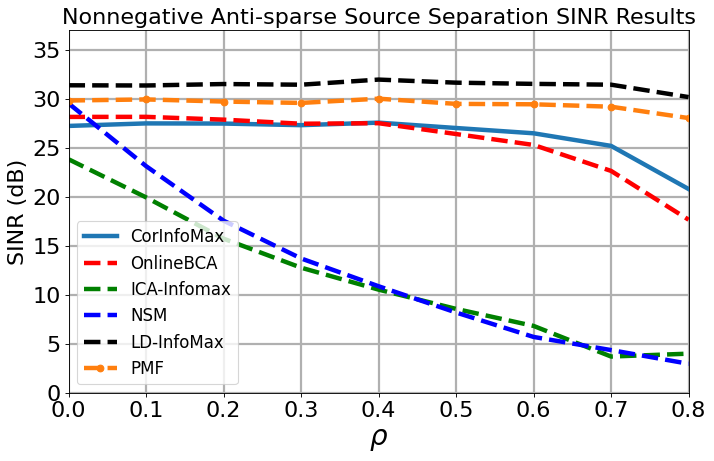

In [11]:
SetPlotRC()

# results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
SINRNSM = results.loc[results['Model'] == 'NSM']['SINR'].to_numpy()
SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(rholist,SINRCorInfoMax,linewidth=4, label = "CorInfoMax")
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4, label = "CorInfoMax2")
plt.plot(rholist,SINRBCA,'r--',linewidth=4, label = "OnlineBCA")
plt.plot(rholist,SINRIca,'g--',linewidth=4, label = "ICA-Infomax")
plt.plot(rholist,SINRNSM,'b--',linewidth=4, label = "NSM")
plt.plot(rholist,SINRLDMI,'k--',linewidth=4, label = "LD-InfoMax")
plt.plot(rholist,SINRPMF,'o--',linewidth=4, label = "PMF")

gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"$\rho$",fontsize=25)
plt.legend(loc='lower left',fontsize=15)
plt.axis([0.0,0.8,-0,37])
plt.title('Nonnegative Anti-sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())

In [12]:
results.loc[results['Model'] == 'CorInfoMax']

,Model,rho,count,SINR
0,CorInfoMax,0.0,100,27.244685
1,CorInfoMax,0.1,100,27.502785
2,CorInfoMax,0.2,100,27.486791
3,CorInfoMax,0.3,100,27.322740
4,CorInfoMax,0.4,100,27.581375
5,CorInfoMax,0.5,100,27.032967
6,CorInfoMax,0.6,100,26.492704
7,CorInfoMax,0.7,100,25.205596
8,CorInfoMax,0.8,100,20.803054


# Antisparse

In [13]:
# df_anti_results = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV1.pkl")

In [14]:
# df_anti_results

In [15]:
# results = df_anti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
# # results.loc[results['Model'] == 'CorInfoMax2']

# table = pd.DataFrame(columns = (["rho"] + list(df_anti_results['Model'].unique())))
# table['rho'] = np.array([0.1*j for j in range(9)])
# for m in list(table.columns[1:]):
#     table[m] = results.loc[results['Model'] == m]['SINR'].values
    
# table

In [16]:
# df_anti_results.loc[df_anti_results['SINR'] == -999]

In [17]:
# results.loc[results['Model'] == 'OnlineBCA']

In [18]:
# results = df_anti_results.loc[df_anti_results['SINR'] != -999][['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
# results.loc[results['Model'] == 'CorInfoMax2']

In [19]:
# SetPlotRC()

# # results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
# SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
# SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
# SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
# SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
# SINRBSM = results.loc[results['Model'] == 'BSM']['SINR'].to_numpy()
# SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
# SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
# rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
# fh2=plt.figure(figsize=(10, 6), dpi=80)

# plt.plot(rholist,SINRCorInfoMax,linewidth=4)
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4)
# plt.plot(rholist,SINRBCA,'r--',linewidth=4)
# plt.plot(rholist,SINRIca,'g--',linewidth=4)
# plt.plot(rholist,SINRBSM,'b--',linewidth=4)
# plt.plot(rholist,SINRLDMI,'k--',linewidth=4)
# plt.plot(rholist,SINRPMF,'o--',linewidth=4)
# gh=plt.grid(linewidth=2)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r"$\rho$",fontsize=25)
# plt.legend(['CorInfoMax','CorInfoMax2','OnlineBCA','ICA-Infomax', 'BSM','LD-InfoMax', 'PMF'],loc='lower left',fontsize=20)
# plt.axis([0.0,0.8,-0,37])
# plt.title('Anti-sparse Source Separation SINR Results',fontsize=20)
# ApplyFont(plt.gca())


In [3]:
df_anti_resultsWSM = pd.read_pickle(r"../ResultsWSM/simulation_resultsWSM_correlated_antisparseV2.pkl")
print('Shape : {}'.format(df_anti_resultsWSM.shape))
df_anti_results = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV2.pkl").iloc[:int(9*7*100)]
df_anti_results_merged = df_anti_results.append(df_anti_resultsWSM, ignore_index = True)

Shape : (242, 13)


In [4]:
df_anti_resultsWSM.loc[df_anti_resultsWSM['rho'] == 0.6]['SINR']

6      19.532324
15     17.747860
24     20.128491
33     19.124028
42     21.100092
51     18.841948
60     13.556003
69     19.194607
78     17.828590
87     19.495702
96     20.255298
105    20.514237
114    20.239436
123    21.951135
132    21.013107
141    17.416287
150    14.771661
159    16.902852
168    16.587574
177    23.138620
186    19.793116
195    13.300289
204    17.697142
213    19.737512
222    21.583912
231    19.290255
240    19.322789
Name: SINR, dtype: float64

In [5]:
results = df_anti_results_merged[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
# results.loc[results['Model'] == 'CorInfoMax2']

table = pd.DataFrame(columns = (["rho"] + list(df_anti_results_merged['Model'].unique())))
table['rho'] = np.array([0.1*j for j in range(9)])
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

,rho,CorInfoMax,CorInfoMax2,OnlineBCA,BSM,ICA,LDMI,PMF,WSM
0,0.0,24.709056,24.044864,25.668309,25.370583,29.643275,29.479405,29.510854,25.363147
1,0.1,24.781422,24.103222,25.551283,18.724845,21.523834,29.651073,29.549875,26.517130
2,0.2,24.697136,23.927696,25.141833,13.685154,16.348270,28.798253,29.262811,24.198119
3,0.3,24.170905,23.167890,24.405175,10.353487,13.109831,28.259328,28.794440,22.154668
4,0.4,23.632991,22.761455,23.601887,7.914876,10.715336,28.257939,28.614109,20.935802
5,0.5,23.257116,22.877828,23.026719,5.811517,8.729421,25.787159,28.206243,19.320542
6,0.6,23.285941,22.703955,22.392018,3.957891,6.961358,23.832697,28.014322,18.891291
7,0.7,22.323396,11.992130,21.017993,2.164253,3.564699,16.810293,26.995702,16.169461
8,0.8,21.421071,21.469299,19.603393,0.253840,4.015459,9.736812,25.576452,13.461101


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


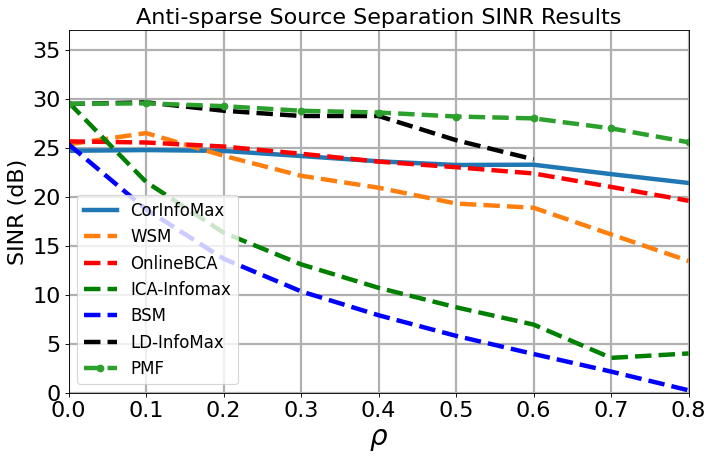

In [7]:
SetPlotRC()

# results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
SINRBSM = results.loc[results['Model'] == 'BSM']['SINR'].to_numpy()
SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
SINRWSM = results.loc[results['Model'] == 'WSM']['SINR'].to_numpy()
rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(rholist,SINRCorInfoMax,linewidth=4, label = "CorInfoMax")
plt.plot(rholist,SINRWSM,"--",linewidth=4, label = "WSM")
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4, label = "CorInfoMax2")
plt.plot(rholist,SINRBCA,'r--',linewidth=4, label = "OnlineBCA")
plt.plot(rholist,SINRIca,'g--',linewidth=4, label = "ICA-Infomax")
plt.plot(rholist,SINRBSM,'b--',linewidth=4, label = "BSM")
plt.plot(rholist[:7],SINRLDMI[:7],'k--',linewidth=4, label = "LD-InfoMax")
plt.plot(rholist,SINRPMF,'o--',linewidth=4, label = "PMF")

gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"$\rho$",fontsize=25)
plt.legend(loc='lower left',fontsize=15)
plt.axis([0.0,0.8,-0,37])
plt.title('Anti-sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())
# plt.savefig('Figures/CorInfoMaxAntisparse_Correlated.pdf', format='pdf')

In [6]:
results.loc[results['Model'] == 'WSM']

,Model,rho,count,SINR
63,WSM,0.0,27,25.363147
64,WSM,0.1,27,26.517130
65,WSM,0.2,27,24.198119
66,WSM,0.3,27,22.154668
67,WSM,0.4,27,20.935802
68,WSM,0.5,27,19.320542
69,WSM,0.6,27,18.891291
70,WSM,0.7,27,16.169461
71,WSM,0.8,26,13.461101


In [8]:
df_anti_resultsWSM.loc[df_anti_resultsWSM['rho'] == 0.6]

,rho,trial,seed,Model,SINR,SINRlist,SNR,S,A,X,Wf,SNRinp,execution_time
6,0.6,0,0,WSM,19.532324,"[5.189872401682701, 8.278646160804449, 8.93606...","[17.13762746593105, 19.225913330687327, 18.913...",None,None,None,"[[0.5333705299231373, 0.0021131996267741756, 0...",None,None
15,0.6,1,431134,WSM,17.747860,"[2.7383339696380475, 6.866327082215364, 9.9243...","[25.95920618048512, 14.458785410819166, 16.140...",None,None,None,"[[0.3244761810278384, 0.23820017913612201, -0....",None,None
24,0.6,2,862268,WSM,20.128491,"[5.245086315985949, 13.63134686581198, 15.2271...","[16.450141508955596, 20.99670250514473, 22.182...",None,None,None,"[[0.2710237194502167, 0.13471888130326237, 0.3...",None,None
33,0.6,3,1293402,WSM,19.124028,"[4.400833554330524, 11.182958848341455, 14.699...","[24.222623805894962, 18.536640808109194, 16.95...",None,None,None,"[[0.2828420849245994, -0.14605592877744467, -0...",None,None
42,0.6,4,1724536,WSM,21.100092,"[3.992494441938206, 10.343233189405455, 11.731...","[23.592345836993793, 22.46223919857723, 24.809...",None,None,None,"[[0.24639423388763945, -0.16834317823778272, -...",None,None
51,0.6,5,2155670,WSM,18.841948,"[4.3518385652171085, 8.997028937080401, 10.519...","[21.48134341180526, 17.00379827592059, 23.5521...",None,None,None,"[[0.10696487411419284, -0.006713410107609631, ...",None,None
60,0.6,6,2586804,WSM,13.556003,"[3.7513801150133474, 10.017365295610771, 10.12...","[26.905979443025444, 15.514219629222012, 15.09...",None,None,None,"[[-0.23945240607043916, 0.4937313647578934, 0....",None,None
69,0.6,7,3017938,WSM,19.194607,"[3.810701792273974, 7.767190432643826, 8.02578...","[27.64362962498521, 16.603113577281473, 19.236...",None,None,None,"[[0.12074284107515385, -0.19704060214179733, 0...",None,None
78,0.6,8,3449072,WSM,17.828590,"[4.135559383889877, 6.784216227779084, 6.49002...","[20.494600757496112, 16.56929385043083, 17.863...",None,None,None,"[[0.039940749780898066, 0.6747270154284839, 0....",None,None
87,0.6,9,3880206,WSM,19.495702,"[2.863145494693967, 7.982256291680581, 8.37683...","[18.006464974325517, 15.965675819779275, 21.05...",None,None,None,"[[0.5430810727718565, -0.0741272460725258, 0.4...",None,None
